#### Lets check how many classes we have and how the labels are distributed

Total images: 4750
Total classes: 12
Loose Silky-bent
Small-flowered Cranesbill
Maize
Cleavers
Scentless Mayweed
Common wheat
Common Chickweed
Black-grass
Fat Hen
Shepherds Purse
Charlock
Sugar beet


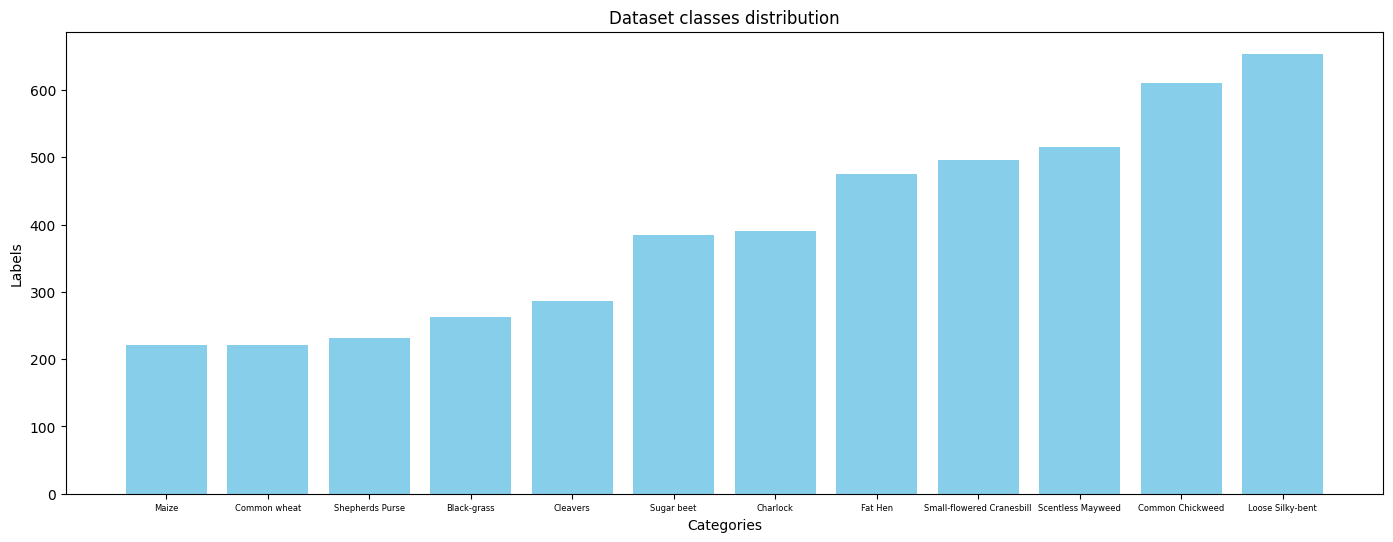

In [40]:
import pandas as pd
from matplotlib import pyplot as plt

LABEL_COLUMN = 1

CSV_PATH = '../data/all_images.csv'
dataset_pd = pd.read_csv(CSV_PATH, header=None)

labels = set(dataset_pd[LABEL_COLUMN])
print(f'Total images: {len(dataset_pd)}')
print(f'Total classes: {len(labels)}')
print(*labels, sep='\n')

stats = {label:len(dataset_pd.loc[dataset_pd[LABEL_COLUMN]==label]) for label in labels}
stats = dict(sorted(stats.items(), key=lambda item: item[1]))

labels = list(stats.keys())
quantity = list(stats.values())

plt.figure(figsize=(17, 6))
plt.bar(labels, quantity, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Labels')
plt.title('Dataset classes distribution')
plt.xticks(fontsize=6)
plt.show()

## Model evaluation

In [ ]:
def collate_fn(data):
    """
    Collator function to properly pass raw data without preprocessing
    """
    return tuple(map(list, zip(*data)))

                           precision    recall  f1-score   support

              Black-grass       0.74      0.61      0.67        56
                 Charlock       0.99      1.00      0.99        81
                 Cleavers       0.98      0.98      0.98        53
         Common Chickweed       0.97      0.97      0.97       119
             Common wheat       0.95      0.95      0.95        37
                  Fat Hen       0.99      0.99      0.99        98
         Loose Silky-bent       0.84      0.93      0.88       126
                    Maize       1.00      0.97      0.99        36
        Scentless Mayweed       0.97      0.97      0.97       118
          Shepherds Purse       1.00      1.00      1.00        50
Small-flowered Cranesbill       1.00      0.99      1.00       103
               Sugar beet       0.99      0.96      0.97        73

                 accuracy                           0.95       950
                macro avg       0.95      0.94      0.95    

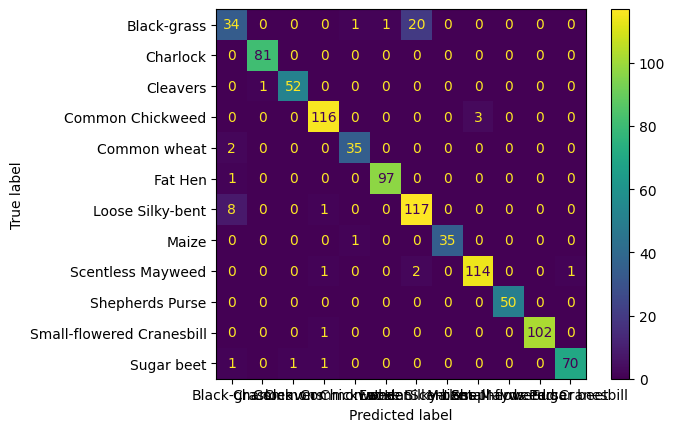

In [27]:
import sys
sys.path.append('/home/maxim/projects/tryolabs-challenge')
from classification_models import GrassClassificationModel
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from utils.utils import EvalDataset

val_data_path = '../model_wheights/vit_tiny/val_data.csv'
image_folder = '../data/images/'
model_path = '../model_wheights/vit_tiny/checkpoint'

dataset = EvalDataset(
    dataset_csv=val_data_path, folder_path=image_folder)
eval_dataloader = DataLoader(
    dataset=dataset, batch_size=64, collate_fn=collate_fn)
model = GrassClassificationModel(model_path=model_path)

y_true = list()
y_pred = list()

for images_batch, labels_batch in eval_dataloader:

    preds, _ = model.run_inference(images=images_batch)
    y_true.extend(labels_batch)
    y_pred.extend(preds)

print(classification_report(y_true=y_true, y_pred=y_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)